<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Grouping-Similar-Problems" data-toc-modified-id="Grouping-Similar-Problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Grouping Similar Problems</a></span><ul class="toc-item"><li><span><a href="#Loading-the-Dataset" data-toc-modified-id="Loading-the-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading the Dataset</a></span></li><li><span><a href="#Group-Data-into-similar-clusters" data-toc-modified-id="Group-Data-into-similar-clusters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Group Data into similar clusters</a></span></li><li><span><a href="#Analyze-Groups" data-toc-modified-id="Analyze-Groups-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analyze Groups</a></span><ul class="toc-item"><li><span><a href="#Count" data-toc-modified-id="Count-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Count</a></span></li><li><span><a href="#Average-Resolution-Time" data-toc-modified-id="Average-Resolution-Time-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Average Resolution Time</a></span></li></ul></li></ul></li></ul></div>

 #  Grouping Similar Problems

In this example, we are going to group customer support problems into problem groups based on their attributes. Then we will analyze the groups to see similarities and differences.

## Loading the Dataset

In [1]:
# Import relevant libraries & packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

# Import data
raw_data = pd.read_csv("issues.csv")
# Preview info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
PROBLEM_TYPE            20 non-null object
COUNT                   20 non-null int64
AVG_CALLS_TO_RESOLVE    20 non-null float64
AVG_RESOLUTION_TIME     20 non-null int64
REOCCUR_RATE            20 non-null float64
REPLACEMENT_RATE        20 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.1+ KB


The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
# Preview data
raw_data.head()

,PROBLEM_TYPE,COUNT,AVG_CALLS_TO_RESOLVE,AVG_RESOLUTION_TIME,REOCCUR_RATE,REPLACEMENT_RATE
0,Admin Password Lost,45,2.3,54,0.15,0.00
1,Windows Reboots automatically,47,3.1,132,0.30,0.03
2,System not coming up after reboot,12,4.0,154,0.02,0.05
3,Slow system,165,1.2,32,0.03,0.00
4,Internet Connectivity loss,321,1.0,5,0.21,0.00


## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

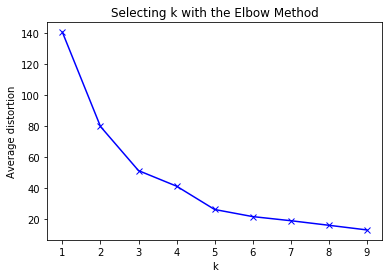

In [3]:
clust_data = raw_data.drop("PROBLEM_TYPE", axis = 1)

# Find optimal # of clusters
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(clust_data)
    prediction = model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])

# plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


Looking at the plot, we see that the knee happens at cluster = 3. This appears to be the ideal number of clusters. We will now perform the actual clustering for k=3. Then we will add the cluster ID to the original dataset.

In [10]:
# Instantiate & fit model w/3 clusters
final_model = KMeans(3)
final_model.fit(clust_data)

# Make predictions
prediction = final_model.predict(clust_data)

# Join predicted clusters back to raw data
raw_data["GROUP"] = prediction
print("Groups Assigned : \n")
raw_data[["GROUP","PROBLEM_TYPE"]]

Groups Assigned : 



,GROUP,PROBLEM_TYPE
0,1,Admin Password Lost
1,1,Windows Reboots automatically
2,1,System not coming up after reboot
3,0,Slow system
4,2,Internet Connectivity loss
5,1,New Installation hangs
6,1,Intermittent Blank Screen
7,0,Too many popups in Browser
8,0,Cannot find printer
9,1,Missing peripheral driver


## Analyze Groups

We'll now visualize how each group differs for various feature attributes using a boxplot.

Let's start with COUNT.

### Count

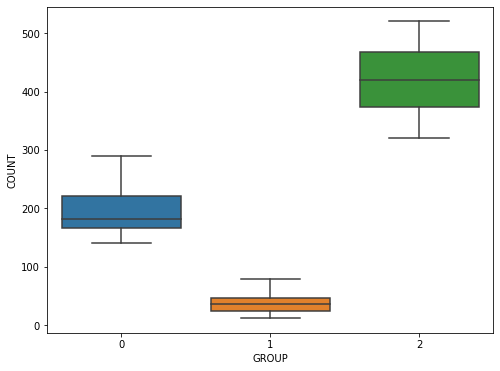

In [24]:
# Import seaborn
import seaborn as sns

# Plot boxplot for COUNT
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="GROUP", y="COUNT", data=raw_data)

We can see that the count of incidents range differently for different groups.

Next let's take a look at the average time it takes for a customer to resolve their problem. 

### Average Resolution Time

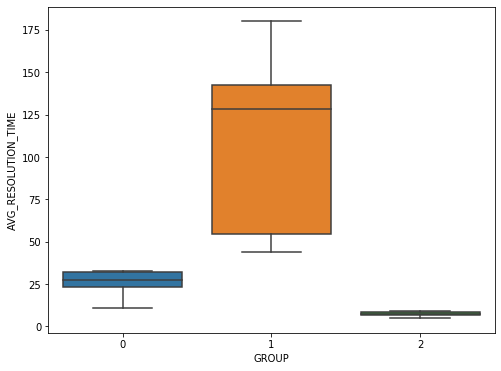

In [26]:
# Plot boxplot for AVG_CALLS_TO_RESOLVE
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="GROUP", y="AVG_RESOLUTION_TIME", data=raw_data)

We can see here that GROUP 2 has a very low average resolution time to resolve their problem. This suggests the problems they are calling to resolve are most likely simple and straight forward. 

A great way for the business to optimize the high-value time of its agents would be to provide a self-service path (product help, online help) for these easy-to-resolve issues. 

Now let's take a look at reoccurance rate to see which GROUP's problems are reoccurring.

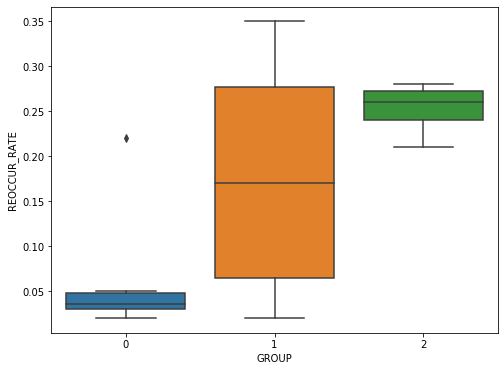

In [25]:
# Plot boxplot for REOCCUR_RATE
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="GROUP", y="REOCCUR_RATE", data=raw_data)

GROUP 2 appears to have a relatively high reoccurance rate compared to the other groups. A great solution would be to analyze these problems and see how the product quality could be improved to prevent these from reoccurring.

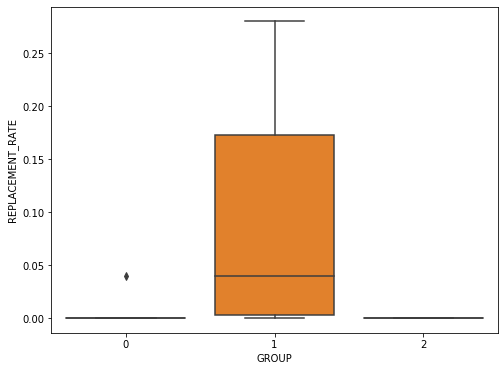

In [27]:
# Plot boxplot for REPLACEMENT_RATE
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="GROUP", y="REPLACEMENT_RATE", data=raw_data)

We can see the replacement rates vary widely for Group 1, while group 0 & 2 are 0. There does not appear to be any stand out pattern for replacement rate between the groups. 